###### This exercise aims to make you comfortable with the basic image processing tools and libraries. This exercise will serve as a starting point before you dive deep into the course.

In [1]:
import numpy as np                 # numpy library useful for most of the mathematical operations
import matplotlib.pyplot as plt    # useful for data visualization/plotting purpose. Can also be used for image visualization.

# For this exercise, we will restrict ourselves to matplotlib only. Please note that other libraries such as PIL, OpenCV
# can also be used as image processing libraries.

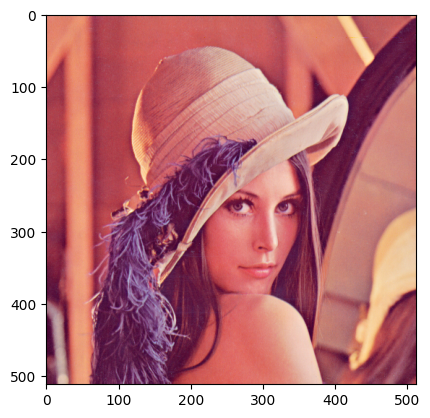

In [2]:
image = plt.imread("lena.png")
plt.imshow(image)

# 1. Image Information

###### Task1.1 : write code to find image dimension and print it

In [3]:
image.shape

(512, 512, 3)

This image has 3 channels, one each for Red, Green and Blue intensities. The intensities are normalized to the range [0, 1]. As for the aspect ratio, the image has a height and widht of 512 pixels, implying a 1:1 ratio

###### Task1.2:  Visualization of each channel

In [4]:
def VisualizeChannel(image,channel):
    '''
    This function is helpful to visualize a specific channel of an RGB image.
    image: RGB image
    channel: channel, one wish to visualize (can take value 0 (for red), 1(green), 2(blue))
    '''
    #write your code here
    output = image[:,:,channel]

    plt.imshow(output, cmap='gray')
    plt.colorbar()
    plt.title(f"Intensity of Channel {channel} expressed as a heatmap")
    return output    # 'output' is image's particular channel values

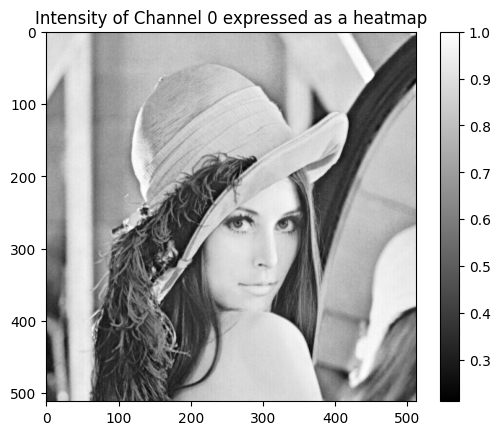

In [5]:
reds = VisualizeChannel(image, 0)

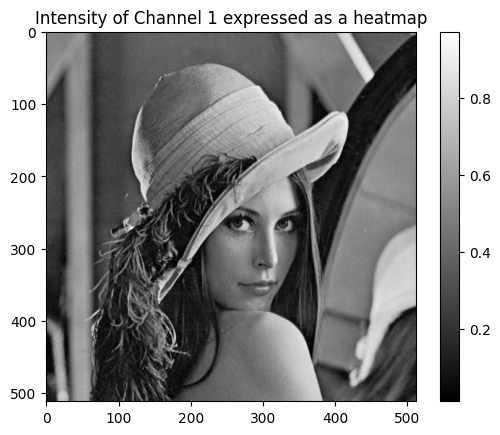

In [6]:
greens = VisualizeChannel(image, 1)

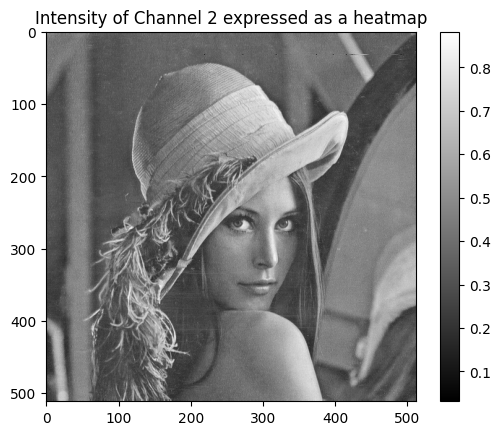

In [7]:
blues = VisualizeChannel(image, 2)

In [8]:
print(f"Intensity range for:\nRed = [{reds.min()}, {reds.max()}]")
print(f"Green = [{greens.min()}, {greens.max()}]")
print(f"Blue = [{blues.min()} , {blues.max()}]")

Intensity range for:
Red = [0.21176470816135406, 1.0]
Green = [0.0117647061124444, 0.9725490212440491]
Blue = [0.0313725508749485 , 0.8823529481887817]


We can see from the numbers that the image has more red intensity that blue and green, this is also visible from the heatmaps as red heatmap is brighter than the blue and green ones. This aligns with our visual interpretation of the actual image which has pinkish-red tones.

# 2. Intensity Manipulations

###### Task2.1: RGB to Gray  

In [9]:
def RGB2Gray(image):
    '''
    This function converts an RGB image to grayscale
    image: RGB image
    '''
    #write you code here and visualize the result
    gray = 0.3 * image[:,:,0] + 0.59 * image[:,:,1] + 0.11 * image[:,:,2]       # Using luminosity method

    return gray       #'gray' is grayscale image, converted from RGB image

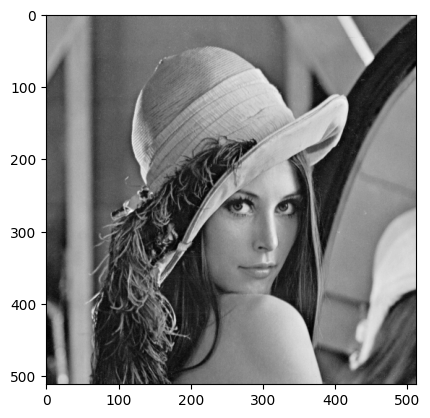

In [10]:
gray_img = RGB2Gray(image)
plt.imshow(gray_img, cmap='gray');

###### Task2.2 : Gray to Binary

A valid range of threshold would be one above the minimum intensity or one below the maximum one. If not, we'll only get either a black or a white output which will not hold any useful information.

In [11]:
def Gray2Binary(image,T):
    '''
    This function converts a gray image to binary based on the rule stated above.
    image: image (can be RGB or gray); if the image is RGB, convert it to gray first
    T: Threshold
    '''

    #check if image is RGB if yes, convert it to gray
    flag = len(image.shape)
    if flag == 3:        #i.e. RGB image, hence to be converted to gray
        # write code to convert it to gray or you can call function "RGB2Gray" defined in task2.1
        image = RGB2Gray(image)


    #Write code to threshold image based on the rule stated above and return this binarized image (say it 'bimage')
    bimage = 1 * (image >= T)

    #write code to visualize the resultant image
    plt.imshow(bimage, cmap='gray')

    return bimage


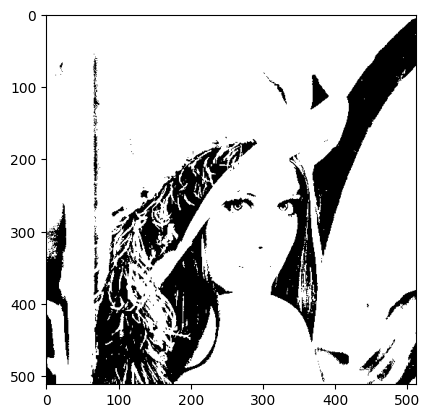

In [12]:
Gray2Binary(image, 0.3);

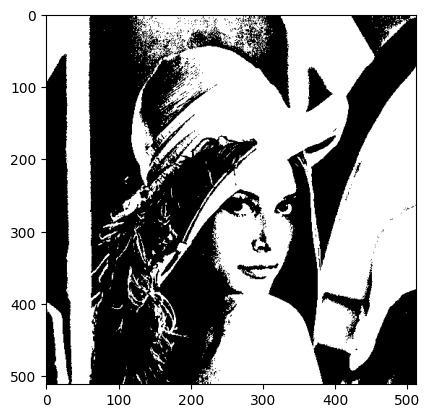

In [13]:
Gray2Binary(image, 0.5);

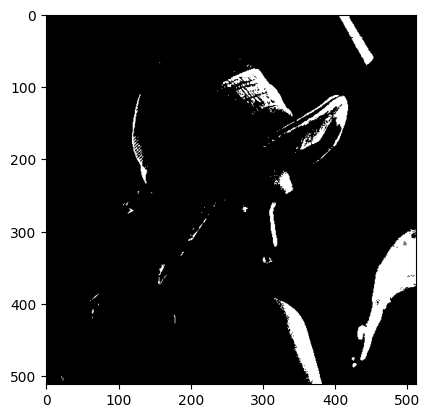

In [14]:
Gray2Binary(image, 0.8);

We can see from the above 3 images, the 0.5 threshold gives us an image close visually closest to the original image. We lose too much context with a very low or very high threshold.

######  Task2.3:  Crop a 5*5 section of a gray image

In [15]:
def ImageCrop(image,r0,c0):
    '''
    This function crops 5*5 rectangular patch defined by image coordinates(r0,c0),(r0,c0+5),(r0+5,c0) and (r0+5,c0+5)
    of an image.
    image: Image can be RGB or gray
    r0: starting row index
    c0: starting column index
    '''
    # write code to check if input is RGB , if its RGB convert it to gray
    if len(image.shape) == 3:
      image = RGB2Gray(image)

    # write code to select 5*5 rectangular patch defined as above (say it 'patch')
    patch = image[r0:r0+5, c0:c0+5]

    # visualize patch and print its value
    plt.imshow(patch, cmap='gray')

    return patch

[[0.6609412  0.6727059  0.6685882  0.6701176  0.69050986]
 [0.6439608  0.65486276 0.6709804  0.67286277 0.6799608 ]
 [0.6601569  0.6539216  0.66921574 0.66741174 0.6789804 ]
 [0.64117646 0.6549412  0.6668235  0.6347451  0.648353  ]
 [0.6142745  0.6307059  0.6498824  0.64376473 0.64913726]]


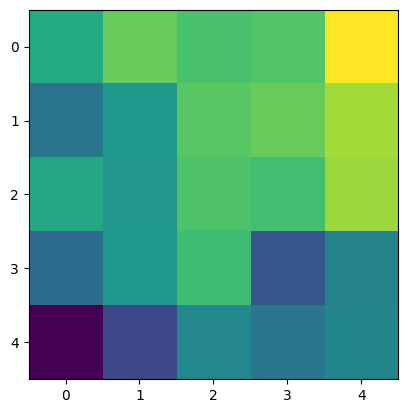

In [16]:
r0 = 250
c0 = 300
patch = ImageCrop(image,r0,c0)
print(patch)
plt.imshow(patch)

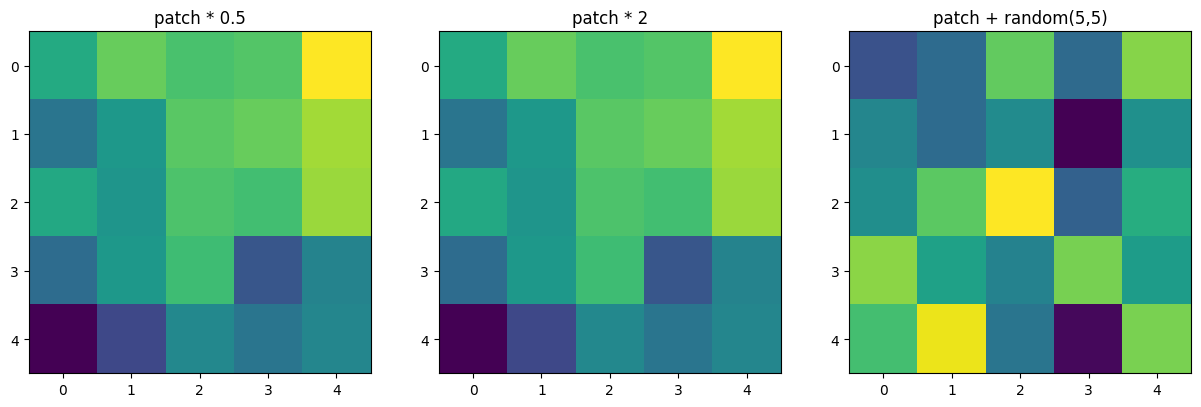

In [17]:
# Experiments with the patch
patch1 = 0.5 * patch
patch2 =  2 * patch
patch3 = patch + np.random.random((5,5))

fig, ax = plt.subplots (1,3, figsize = (15,5))
ax[0].imshow(patch1)
ax[0].set_title("patch * 0.5")
ax[1].imshow(patch2)
ax[1].set_title("patch * 2")
ax[2].imshow(patch3)
ax[2].set_title("patch + random(5,5)");

###### Task2.4: Uniform Brightness Scaling

In [18]:
def UniformBrightScaling(image,scale):
    '''
    This function uniformly increases or decreases the pixel values (of all image locations) by a factor 'scale'.
    image: image (can be RGB or gray image)
    scale: A scalar by which pixels'svalues need to be multiplied
    '''
    #write your code here
    output = image * scale

    #display the resultant image
    plt.imshow(output)

    return output        #replace output with the variable name you used for final result

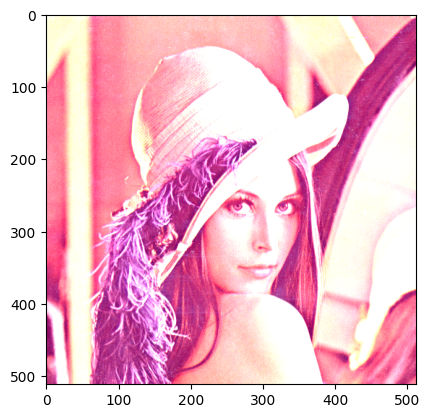

In [19]:
## Image normalization
scale = 2
bright_scaled = UniformBrightScaling(image, scale)


In case the scaling increases bright values beyond 1, we need to clip them to 1 as they've reached the maximum intensity

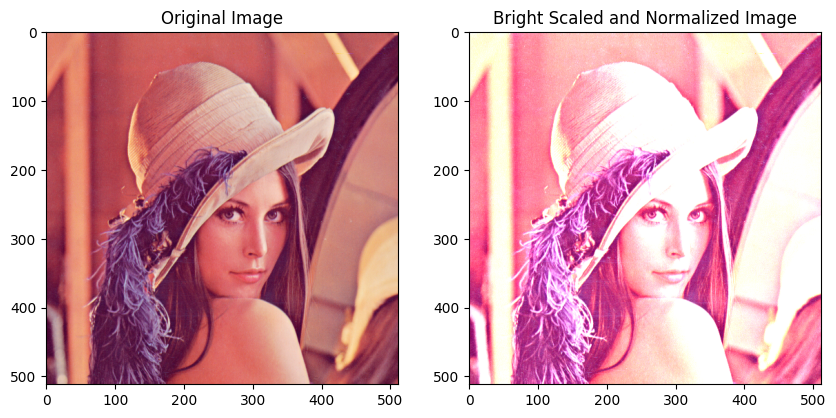

In [20]:
bright_scaled[bright_scaled > 1] = 1

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].imshow(image)
ax[0].set_title("Original Image")

ax[1].imshow(bright_scaled);
ax[1].set_title("Bright Scaled and Normalized Image");

# 3. Image Filtering

In [21]:
def feature_extractor(image,kernel):
    '''
    This function performs convolution operation to a gray image. We will consider 3*3 kernel here.
    In general kernel can have shape (2n+1) * (2n+1)  where n >= 0
    image: image (can be RGB or gray); if RGB convert it to gray
    kernel: 3*3 convolution kernel
    '''
    # first convert RGB to gray if input is RGB image

    l = len(image.shape)

    if l == 3:
        #write code to convert it to gray scale
        image = RGB2Gray(image)

    # write code to create a zero array of size (r,c) which will store the resultant value at specific pixel locations (say it output)
    output = np.zeros(image.shape)

    # write code to create a zero array with size (r+2,c+2) if (r,c) is the gray image size.  (say it pad_img)
    r, c = image.shape
    pad_img = np.zeros((r+2, c+2))

    # now copy gray image to above created array at location starting from (1,1)
    pad_img[1:-1, 1:-1] = image


    # write code to convolve the image
    for row in range(1, r+1):             # use appropriate range values of row and col
      for col in range(1, c+1):
        # selected 3*3 patch with center at (row, col), performed element wise multiplication and then summed it
        output[row-1, col-1] = np.sum(np.multiply(pad_img[row-1:row+2, col-1:col+2], kernel))

    return output

In [22]:
## Note that the steps described above are to help you get started. You can follow other valid steps too. Result from all
 #of the method should be the same. Pseudocode is available at: https://en.wikipedia.org/wiki/Kernel_(image_processing)

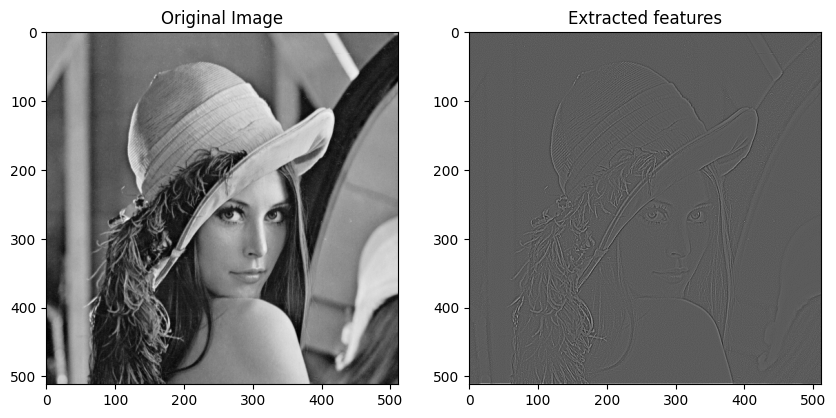

In [23]:
edge_detector = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].imshow(RGB2Gray(image), cmap='gray')
ax[0].set_title("Original Image")

ax[1].imshow(feature_extractor(image, edge_detector), cmap='gray');
ax[1].set_title("Extracted features");

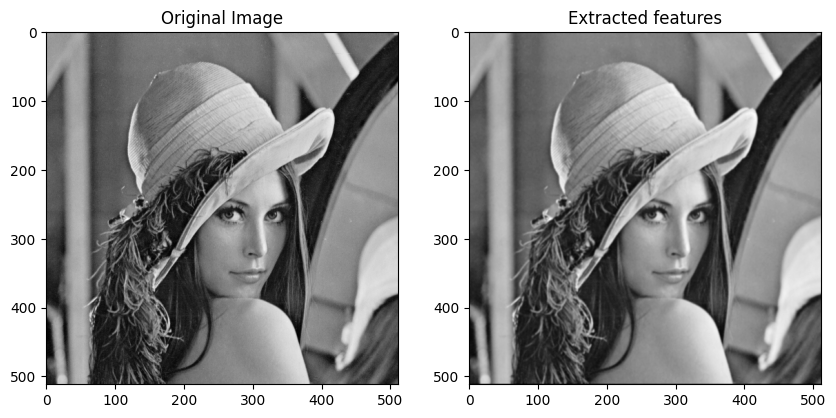

In [24]:
gauss_blur = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].imshow(RGB2Gray(image), cmap='gray')
ax[0].set_title("Original Image")

ax[1].imshow(feature_extractor(image, gauss_blur), cmap='gray');
ax[1].set_title("Extracted features");

# 4.Geometric Transformation

###### Task4.1: Image Rotation (In-plane)

In [25]:
def RotateImg(image, ang):
  '''
  This image performs a "ang" degrees anticlockwise rotation on the image
  '''

  # Convert to radian and design a rotation matrix
  ang = ang * np.pi/180
  R = np.array([[np.cos(ang), -np.sin(ang)], [np.sin(ang), np.cos(ang)]])

  # convert image to grayscale if RGB
  if len(image.shape) == 3:
    image = RGB2Gray(image)

  img_new = np.zeros(image.shape)
  xdim, ydim = image.shape
  for x in range(xdim):
    for y in range(ydim):
      xn = R[0,0] * (x - xdim/2) + R[0,1] * (y - ydim/2)
      yn = R[1,0] * (x - xdim/2) + R[1,1] * (y - ydim/2)
      xn, yn = int(xn + xdim/2), int(yn + ydim/2)

      if xn >= 0 and xn < image.shape[0] and yn >= 0 and yn < image.shape[1]:
        img_new[xn, yn] = image[x, y]


  return img_new

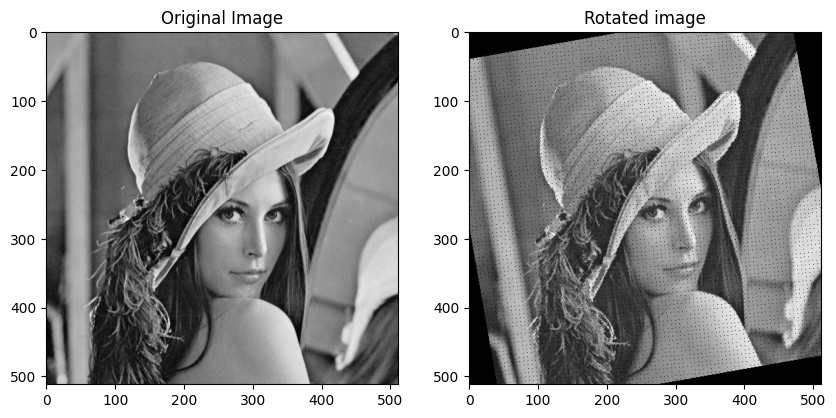

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].imshow(RGB2Gray(image), cmap='gray')
ax[0].set_title("Original Image")

ax[1].imshow(RotateImg(image, ang=10), cmap='gray');
ax[1].set_title("Rotated image");